<a href="https://colab.research.google.com/github/riVFerd/PCVK/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np

from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive/')

Mounted at /content/drive/


mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 100


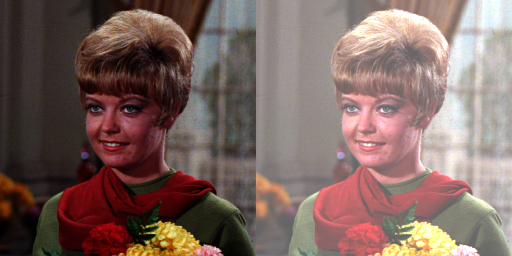

In [2]:
print('mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number!')


original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    for z in range(original.shape[2]):

      brightness_image[x,y,z] = np.clip(original[x,y,z] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

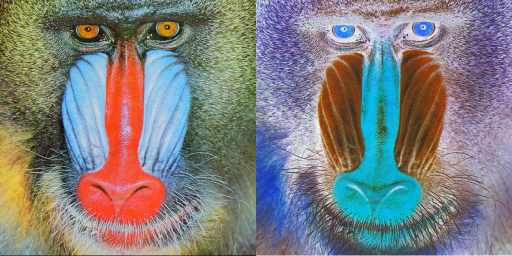

In [3]:
# Jawaban Tugas No 1:

image = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
result = np.zeros(image.shape, image.dtype)

for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):

      result[x,y,z] = np.clip(255 - image[x,y,z], 0, 255)

final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)

Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


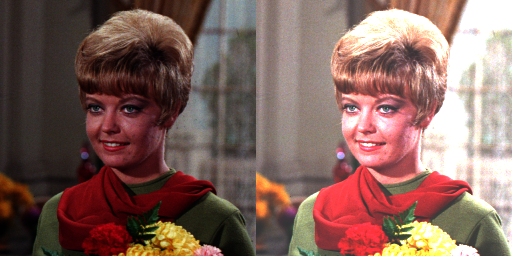

In [4]:
# Jawaban Tugas No 2:

try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number!')

image = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
result = np.zeros(image.shape, image.dtype)

for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):

      result[x,y,z] = np.clip(contrast * image[x,y,z] + brightness, 0, 255)

final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai konstanta: 50


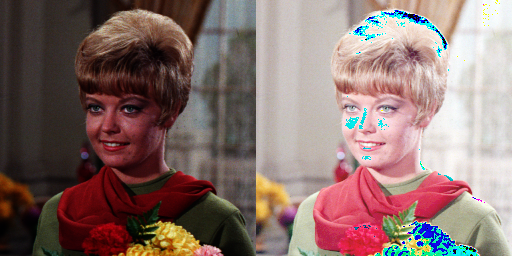

In [5]:
# Jawaban Tugas No 3:

print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

try:
  conts = int(input('Masukkan nilai konstanta: '))
except ValueError:
  print('Error, not a number!')

image = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
result = np.zeros(image.shape, image.dtype)

for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
      result[x,y,z] = conts * np.log(1 + image[x,y,z])

final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)

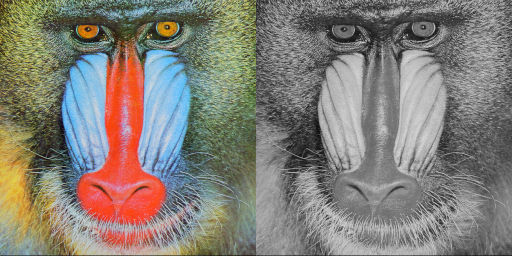

In [6]:
# Jawaban Tugas No 4a: Metode Avaraging
image = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
result = np.zeros(image.shape, image.dtype)

for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
      result[x,y,z] = (int(image[x,y,0]) + int(image[x,y,1]) + int(image[x,y,2])) // 3

final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)

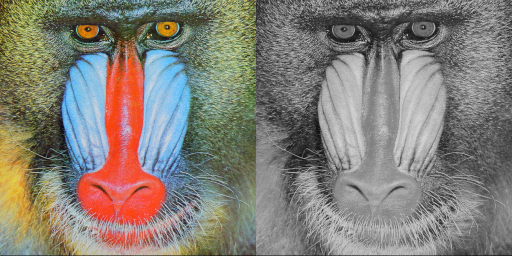

In [7]:
# Jawaban Tugas No 4b: Lightness
image = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
result = np.zeros(image.shape, image.dtype)

for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):
      max_val = np.max([int(image[x,y,0]),int(image[x,y,1]),int(image[x,y,2])])
      min_val = np.min([int(image[x,y,0]),int(image[x,y,1]),int(image[x,y,2])])
      result[x,y,z] = (max_val + min_val) // 2

final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)

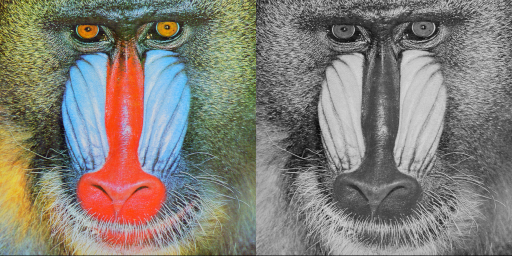

In [8]:
# Jawaban Tugas No 4c: Luminance
image = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
result = np.zeros(image.shape, image.dtype)

for x in range(image.shape[0]):
  for y in range(image.shape[1]):
    for z in range(image.shape[2]):

      result[x,y,z] = (int(0.21 * image[x,y,0]) + int(0.72 * image[x,y,1]) + int(0.07 * image[x,y,2]))

final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)

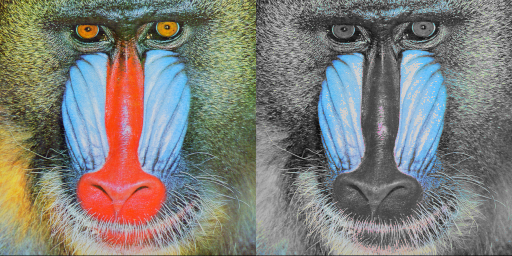

In [31]:
# Jawaban Tugas No 5:

image = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
image = cv.resize(image, (0, 0), fx=0.5, fy=0.5)
result = np.zeros(image.shape, image.dtype)

for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        pixel = image[x, y]

        if (pixel[0] >= 145 and pixel[0] <= 255 and not pixel[1] >= 200 and not pixel[2] >= 200):
            result[x, y] = pixel
        else:
            grayscale = int(0.21 * pixel[0] + 0.72 * pixel[1] + 0.07 * pixel[2])
            result[x, y, :] = grayscale

final_frame = cv.hconcat((image, result))
cv2_imshow(final_frame)
